In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\HP\\python\\Revision Folder'

In [4]:
os.chdir('F:\\Library\\Analytics Path\\02-R\\02-R DataSets\\Linea Reg')


In [5]:
insurance = pd.read_csv('insurance.csv')

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
import matplotlib.pyplot as plt

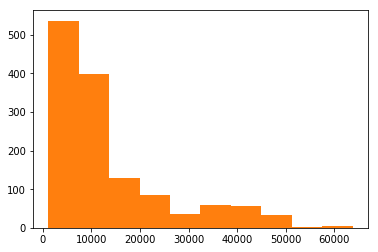

In [10]:
plt.hist(insurance['charges'])
plt.show()

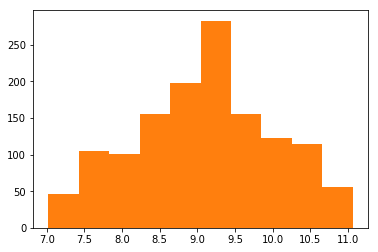

In [13]:
plt.hist(np.log(insurance['charges']))
plt.show()

In [14]:
insurance.isnull().sum().sum()

0

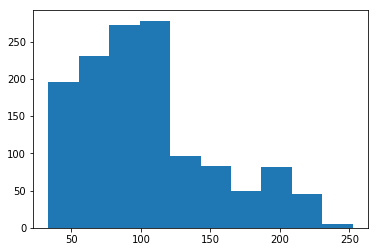

In [15]:
plt.hist(np.sqrt(insurance['charges']))
plt.show()

In [16]:
insurance['log_charges'] = np.log(insurance['charges'])

In [17]:
insurance.drop('charges',axis = 1,inplace = True)

In [18]:
insurance.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [22]:
insurance=insurance.loc[(insurance['log_charges']>= np.mean(insurance['log_charges'])-3*np.std(insurance['log_charges'])) & \
             (insurance['log_charges']<=np.mean(insurance['log_charges'])+3*np.std(insurance['log_charges'])),:]

In [23]:
colToDummy = "sex children smoker region".split()

In [24]:
insurance[['age','bmi','log_charges']].corr()

,age,bmi,log_charges
age,1.000000,0.109272,0.527834
bmi,0.109272,1.000000,0.132669
log_charges,0.527834,0.132669,1.000000


In [25]:
insurance.drop('bmi',axis = 1,inplace = True)

In [26]:
dummiedCols = pd.get_dummies(insurance[colToDummy])

In [27]:
insurance.drop(colToDummy,axis = 1, inplace = True)

In [29]:
insurance = insurance.join(dummiedCols)

In [30]:
X = insurance.drop('log_charges',axis=1)
y = insurance['log_charges']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [ ]:
import random
random.seed()
random.sample(list,si)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linmod_obj = LinearRegression()

In [35]:
linmod = linmod_obj.fit(X_train,y_train)

In [36]:
linmod.intercept_

8.066746918226178

In [37]:
linmod.coef_

array([ 0.03545799,  0.0989679 ,  0.02057919, -0.02057919, -0.78033075,
        0.78033075,  0.06145913,  0.01502669, -0.03421036, -0.04227546])

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
y_pred = linmod.predict(X_test)

In [41]:
r2_score(y_pred,y_test)

0.73849586907707609

In [42]:
linmod.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>